# 1. Введение

## Свойства среднего

- $M_{(x+c)}=M_x + c$
- $M_{(x*c)}=M_x*c$
- $\sum\limits_i(x_i - M_x)=0$

### Дисперсия и стандартное отклонение

Дисперсия и стандартно отклонение генеральной совокупности:

- $D = \dfrac{\sum_i(x_i - M_x)^2}{n}$
- $\sigma = \sqrt{D}$

Дисперсия и стандратное отклонение выборки:

- $D = \dfrac{\sum_i(x_i - \overline{x})^2}{n - 1}$
- $sd_x = \sqrt{D}$

### Свойства дисперсии

- $D_{(x + c)} = D_x$
- $sd_{(x+c)} = sd_x$
- $D_{(x * c)} = D_x * c^2$
- $sd_{(x*c)} = sd_x * c$

## Box Plot

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

In [10]:
s = pd.Series(data, name="Data")

In [12]:
s.describe()

count     95.000000
mean      50.015456
std       53.573114
min      -95.786890
25%       24.088038
50%       50.000000
75%       74.741467
max      195.501992
Name: Data, dtype: float64

In [21]:
s.median()

50.0

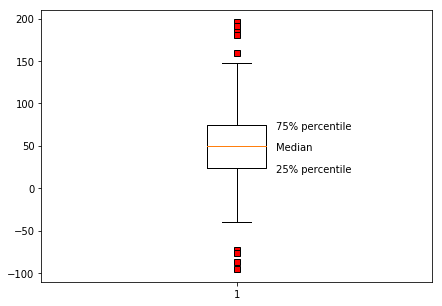

In [37]:
plt.figure(figsize=(7, 5))
red_sqares = dict(markerfacecolor='r', marker='s')
plt.annotate("Median", (1.1, s.median()-5))
plt.annotate("25% percentile", (1.1, 24.088038 - 5))
plt.annotate("75% percentile", (1.1, 74.741467 - 5))
plt.boxplot(s, flierprops=red_sqares);

## Нормальное распределение

In [55]:
mean = 10
sd = 1
data = np.random.normal(mean, std, size=500)

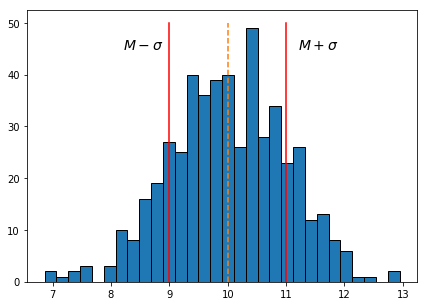

In [88]:
plt.figure(figsize=(7, 5))
plt.hist(data, bins=30, edgecolor='k')
plt.plot([mean, mean], [0, 50], '--', label='mean')
plt.plot([mean + std, mean + sd], [0, 50], 'r-', label=r"$M + \sigma$")
plt.annotate(r"$M + \sigma$", (mean + sd + 0.2, 45), size=14)
plt.plot([mean - std, mean - sd], [0, 50], 'r-', label=r"$M - \sigma$")
plt.annotate(r"$M - \sigma$", (mean - sd - 0.8, 45), size=14);

##  Стандартизация

z-преобразование со средним = 0 и дисперсией = 1:

$z_i = \dfrac{x_i - \overline{x}}{\text{sd}_x}$

Таблицы z-значений:

http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf  (процент наблюдений, не превышающий указанное z-значение)

http://www.normaltable.com/ztable-righttailed.html  (процент наблюдений, превышающий указанное z-значение)

https://gallery.shinyapps.io/dist_calc/

## Центральная предельная теорема

Если из ГС брать выборки и замерять их средние, то они также образуют нормальное распределение со средним = среднему ГС. Отклонение выборки средних рассчитывается как стандартная ошибка среднего:

$\text{se} = \dfrac{\sigma}{\sqrt{n}} = \dfrac{\text{sd}_x}{\sqrt{n}}$

где n - число примерок в выборке. Если n > 30, то при расчете se можно в числителе использовать стандартное отклонение самой выборки (вместо стандартного отклонения ГС)

### Построение доверительного интервала

Пусть дана выборка со следующими параметрами:

- $\overline{\text{x}} = 100$
- $\text{sd} = 4$
- $n = 100$

Рассчитать 95% доверительный интервал для данного наблюдения

Для наччала рассчитаем стандартную ошибку среднего для имеющейся выборки:

$\text{se} = \dfrac{\text{sd}}{\sqrt{n}} = \dfrac{4}{\sqrt{64}} = 0.5$

Правая граница 95% доверительного интервала = $ \overline{\text{x}} + 1.96\text{se}$

Левая граница 95% доверительного интервала = $ \overline{\text{x}} - 1.96\text{se}$

Итого, наш 95% доверительный интервал: [99.2, 100.98] - с вероятностью 95% среднее ГС входит в этот доверительный интервал

## Статистическая проверка гипотез

Допустим, что время, необходимое на выздоровление пациента от какой-либо болезкни в среднем = 20 дням

$M = 20$

Был разработан некий препарат, который был протестирован на 64 пациентов, случайно выбранных из общего числа всех пациентов. По результатам оказалось, что среднее время выздоровления этих пациентов снизилось до 18.5 дней. Стандартное отклонение составило 4.

$n = 64$

$\text{sd} = 4$

$\overline{\text{x}} = 18.5$

Выяснить, действительно ли препарат мог повлиять на такое снижение срока выздоровления.

Будет проверять 2 гипотезы - нулевая гипотеза заключается в том, что на самом деле препарат никак не повлиял на средний срок выздоровления и в генеральной совокупности пациентов, которые принимали новый препарат, он так и остался = 20.

Противоположная гипотеза будет говорить о том, что средний срок выздоровления в генеральной совокупности пациентов, принимавших новый препарат не равен 20.

$\text{H}_0\quad M_{нп} = 20$

$\text{H}_1\quad M_{нп} \ne 20$

Начнем с проверки нулевой гипотезы. Согласно ЦПТ известно, что если бы мы многократно делали выборки пациентов, принимающих новый препарат, то выборочные средние образовали бы нормальное распределение со средним = среднему генеральной совокупности (т.е. в нашем случае 20) и стандартным отклонением = se.

Нам нужно ответить на вопрос - на сколько сильно от среднего генеральной совокупности отклонилось среднее нашей выборки (которое равно 18.5) в единицах стандартного отклонения. Для этого необходимо сделать z-преобразование:

Для начала рассчитаем стандартное отклоенние для выборки:

$\text{se} = \dfrac{4}{\sqrt{64}} = 0.5$

$z = \dfrac{\overline{\text{x}} - M_{нп}}{\text{se}} = \dfrac{18.5 - 20}{4} = -3$

Результат означает, что если бы в генеральной совокупности среднее значение = 20, то наше выборочное среднее отклонилось бы на величину равную 3 стандартным отклонениям (3*se)

__p-уровень значимости__

Зная эту величину мы можем рассчитать вероятность такого или еще более сильного отклонения от среднего ГС. Для этого можно использовать z-таблицы или же онлайн-калькулятор. Нас интересуют отклоения в обе стороны (т.е. все, что меньше отрицательного отклонения, а также все, что больше положительного отклонения)

Соглано рассчетам, вероятность отклоениня среднего больше чем на 3 стандратных отклоениня от среднего ГС = 0.0027

**Чем меньше p-уровень значимости, тем больше оснований отклонить нулевую гипотезу. В общем случае, если p-уровень значимости меньше 0.005, то нулевая гипотеза может быть отклонена. В противном случае мы говорим о том, что у нас недостаточно оснований для отклонения нулевой гипотезы.**

### Типы статистических ошибок

**Ошбика первого рода:** мы отклоняем нулевую гипотезу, хотя на самом деле она была верна. Например, это могло случиться из-за того, что мы чисто случайно получили статистически значимый результат.

**Ошибка второго рода:** мы не отклоняем нулевую гипотезу, хотя была верна альтернативная.

# 2. Сравнение средних

# t-распределение Стьюдента

Когда размер наших выборок из ГС невелик, то вполне возможна ситуация, что средние выборок будут сильно отклоняться от среднего ГС. Таким образом, мы не можем доверять z-критерию. Мы прибегаем к использованию t-распределения Стьюдента. Оно похоже на нормальное распределение, но "хвосты" распологаются выше, чем у нормального распределения. "Хвосты" располагаются тем выше, чем меньше степеней свободы (df). Таким образом, в "хвостовых" частях будет содержаться довольно большой процент наблюдений. 

## Критерий t-Стьюдента для сравнения двух выборок

Пусть у нас имеется 2 выборки со своими значениями:

| Выборка 1 | Выборка 2 |
|----------|----------|
|$\bar{\text{x}}_1$|$\bar{\text{x}}_2$|
|$\text{sd}_1$|$\text{sd}_2$|
|$n_1$|$n_2$|

Мы хотим сравнить два выборочных средних значения.

Будем проверять 2 гипотезы. О том, что в ГС эти средние равны и о том, что в ГС средние не равны.

$\text{H}_0\quad M_{1} = M_{2}$

$\text{H}_1\quad M_{1} \ne M_{2}$

Предположим, что верна нулевая гипотеза. Тогда, если бы мы многократно извлекали выборки и находили разности их средних (т.е. $\bar{\text{x}}_1 - \bar{\text{x}}_2)$, то эти значения распредилились бы нормально вокруг соответствуюшего среднего значения ГС, которое было бы равно $M_1 - M_2 = 0$

Стандартное отклонение (стандартная ошибка) такого распределения рассчитывается по формуле:

$\text{se} = \sqrt{\dfrac{{\text{sd}_1}^2}{n_1} + \dfrac{{\text{sd}_2}^2}{n_2}}$

Полученное в результате распределение также будет соответствовать **t-распределению** с числом степеней свободы:

$df = (n_1 - 1) + (n_2 - 1) = n_1 + n_2 - 2$

Обладая всей вышеизложенной информацией мы можем рассчитать, на сколько именно наша разность между средними значениями выборок отклонилась от предполагаемого показателя генеральной совокупности. Тем самым мы можем рассчитать вероятность получить такие или еще более выраженные различия при условии, что на самом деле верна нулевая гипотеза.

Итоговое значение t-критерия будет следующим:

$t = \dfrac{(\bar{\text{x}}_1 - \bar{\text{x}}_2) - (M_1 - M_2)}{\sqrt{\dfrac{{\text{sd}_1}^2}{n_1} + \dfrac{{\text{sd}_2}^2}{n_2}}} = \dfrac{\bar{\text{x}}_1 - \bar{\text{x}}_2}{\sqrt{\dfrac{{\text{sd}_1}^2}{n_1} + \dfrac{{\text{sd}_2}^2}{n_2}}}$

**Зная t и df мы можем рассчитать значение p-value**

## Пример:

Процесс денатурации ДНК представляет собой разрушение водородных связей между двумя цепями этой молекулы и очень сильно зависит от температуры, с которой мы воздействуем на молекулу.

При сравнении двух видов в исследовании были получены следующие различия в средней температуре плавления ДНК:

|вид/критерий| M | sd | n |
|-|---|----|---|
| Вид 1| 89.9 | 11.3 | 20 |
| Вид 2| 80.7 | 11.7 | 20 |

Нужно выяснить, являются ли эти различия статистически значимыми (т.е. действительно ли у видом разная температура плавления ДНК)

Гипотеза 0 будет говорить нам о том, что на самом деле средняя температура плавления Вида 1 не отличается от температуры плавления Вида 2. А гипотеза 1 будет говорить о том, что температуры плавления различны.

$\text{H}_0\quad M_{\text{вид 1}} = M_{\text{вид 2}}$

$\text{H}_1\quad M_{\text{вид 1}} \ne M_{\text{вид 2}}$

Рассчитаем t-критерий:

$t = \dfrac{\bar{\text{x}}_1 - \bar{\text{x}}_2}{\sqrt{\dfrac{{\text{sd}_1}^2}{n_1} + \dfrac{{\text{sd}_2}^2}{n_2}}}$

И также число степеней свободы:

$df = n_1 + n_2 - 2$

In [1]:
import numpy as np

In [4]:
M_1 = 89.9
M_2 = 80.7
sd_1 = 11.3
sd_2 = 11.7
n_1 = n_2 = 20

t = (M_1 - M_2) / np.sqrt(np.square(sd_1) / n_1 + np.square(sd_2) / n_2)
df = n_1 + n_2 - 2

print("t-критерий:", t)
print("df: ", df)

t-критерий: 2.529439633102561
df:  38


Используя эти значения можем рассчитать вероятность нашего отклонения. Вероятность такого отклонения составляет: 0.0157

Таким образом, мы получили статистически значимый результат, который позволяет отвергнуть нулевую гипотезу. Значит, мы обнаружили, что температура плавления ДНК у вида 1 отличасется от температуры плавления ДНК вида 2.

Таблица для определения коэффициентов для доверительных интервалов:

https://www.medcalc.org/manual/t-distribution.php

## Проверка распределения на нормальность

In [24]:
from scipy import stats

In [17]:
m = 15
sd = 5
data = np.random.normal(loc=m, scale=sd, size=1000)

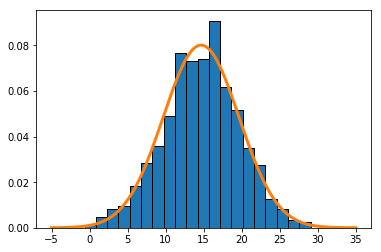

In [37]:
plt.hist(data, bins=20, ec='k', density=True)
xticks = plt.xticks()[0]
min_x, max_x = min(xticks), max(xticks)
line = np.linspace(min_x, max_x, 1000)
pdf_g = stats.norm.pdf(line, m, sd)
plt.plot(line, pdf_g, '-', lw=3);

In [23]:
xticks

array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.])

## QQ Plot

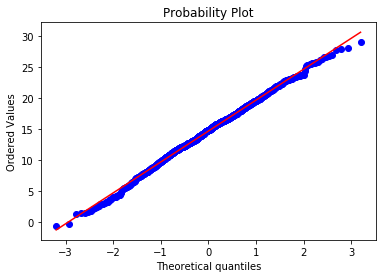

In [57]:
stats.probplot(data, dist="norm", plot=plt);

In [66]:
data_new = np.random.rand(1000) * data + 5

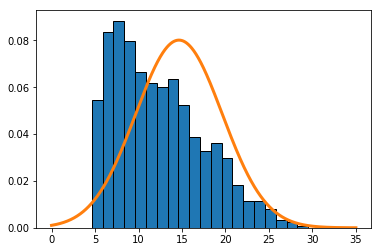

In [67]:
plt.hist(data_new, bins=20, ec='k', density=True)
xticks = plt.xticks()[0]
min_x, max_x = min(xticks), max(xticks)
line = np.linspace(min_x, max_x, 1000)
pdf_g = stats.norm.pdf(line, m, sd)
plt.plot(line, pdf_g, '-', lw=3);

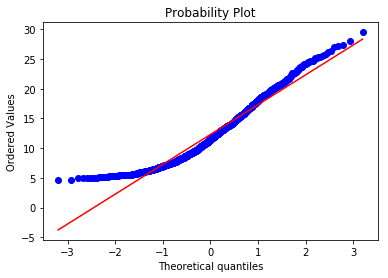

In [69]:
stats.probplot(data_new, dist="norm", plot=plt);

Если распределение признаков сильно отличается от нормального (например, имеются явные выбросы), то это может привести к неверным результатам при использовании t-критерия Стьюдента. В таком случае можно использовать непараметрический критерий - U-критерий Манна - Витни (Mann - Whitney U-test), который переводит все показания признака в ранговую шкалу (т.е. все показания ранжируются от первого до последнего наблюдения)

# Однофакторный дисперсионный анализ (ANOVA)

In [1]:
import pandas as pd
import numpy as np

Пусть имеется 3 выборки данных:

In [5]:
data = pd.DataFrame({1: [3, 1, 2], 2: [5, 3, 4], 3: [6, 7, 5]})
data

,1,2,3
0,3,5,6
1,1,3,7
2,2,4,5


Мы хотим понять, взяты ли данные выборки (хотя бы одна из них) из разных генеральных совпокупностей. Или же все они относятся к одной ГС. Таким образом, будем проверять следующие гипотезы:

$\text{H}_0\quad M_{1} = M_{2} = M_{3}$

$\text{H}_1\quad M_{1} \ne M_{2} \ne M_{3}$

Для начала рассчитаем среднее значение всех наблюдений:

$\overline{\overline{X}} = \dfrac{3 + 1 + 2 + 5 + 3 + 4 + 6 + 7 + 6}{9} = 4$

In [12]:
data.values.mean()

4.0

Далее переходим к базовому понятию дисперсионного анализа - **общей сумме квадратов** (**SST**) (общая изменчивость наших данных). Данный показатель характеризует, на сколько высока изменчивость наших данных без учета разделения на группы.

Для рассчета этого показателя необходимо рассчитать сумму квадратов отклонений от среднего значения для каждого из наблюдений.

$\text{SST} = (3 - 4)^2 + (1-4)^2+(2-4)^2+(5-4)^2+(3-4)^2+(4-4)^2+(6-4)^2+(7-4)^2+(5-4)^2 = 30$

In [24]:
((data - 4) ** 2).values.sum()

30

Определим число степеней свободы для нашего набора данных. Это число независимых элементов в наборе данных. В нашем случае число элементов = 9, но только 8 из них будут являться независимыми (т.к. если бы мы знали значение общего среднего и SST, то, зная значения 8 элементов, мы бы могли узнать 9-ый элемент)

$\text{df} = N - 1 = 8$

**Общая изменчивость наших данных (SST) может проистекать только из двух источников:**

1. Сумма квадратов междугрупповая - **SSB**
2. Сумма квадратов внутригрупповая - **SSW**

Рассчитаем эти показатели для нашего набора данных. Для SSW нужно знать среднее значение внутри каждой группы (выборки).
В нашем случае значения следующие:

- $\overline{x}_1 = 2$
- $\overline{x}_2 = 4$
- $\overline{x}_3 = 6$

In [26]:
data

,1,2,3
0,3,5,6
1,1,3,7
2,2,4,5


In [25]:
data.mean(axis=0)

1    2.0
2    4.0
3    6.0
dtype: float64

SSW будет равно сумме квадратов разностей между значениями в каждой группе и соответствующими группам средним значениям.

Т.е.:

$\text{SSW} = (3-2)^2+(1-2)^2+(2-2)^2+(5-4)^2+(3-4)^2+(4-4)^2+(6-6)^2+(7-6)^2+(5-6)^2 = 6$

In [31]:
((data - [2, 4, 6]) ** 2).values.sum()

6

Число степеней свободы для данного показателя рассчитывается по формуле:
    
$\text{df} = N - m$, 

где m - число групп

В нашем случае **df = 6**

Такая формула проистекает из того факта, что, если бы мы знали SSW и групповые средние, то нам было бы достаточно по 2 элемента из каждой из групп для того, чтобы найти их третьи элементы.

Для рассчета **SSB** необходимо рассчитать сумму произведений числа элементов в каждой группе на квадраты отклонений средних значений группы от общего среднего.

Т.е.:

$\text{SSB} = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$

In [37]:
np.sum(data.notnull().sum(axis=0) * np.square(data.mean(axis=0) - 4))

24.0

Число степеней свобод в данном случае будет рассчитываться по формуле:

$\text{df} = m - 1$

В нашем случае **df = 2**

Так как независимые переменные у нас - средние каждой из групп, то, зная общее среднее групп и всего 2 средних мы можем определить среднее значение третьей группы.

В результате вычисления значений SSW и SSB мы получили, что большая часть общей изменчивости достигается за счет межгрупповой изменчивости, что говорит о том, что группы сильно отличаются друг от друга.

Если бы мы получили обратные результаты (т.е. если бы SSW вносило больший вклад), то мы бы говорили о том, что группы в целом не отличаются, а та общая изменчивость, что у нас есть, достигается за счет изменчивости внутри каждой из групп.

**Теперь мы можем рассчитать основной статистический показатель дисперсионного анализа - F-значение**

$\mathbf{F} = \dfrac{\dfrac{\mathbf{SSB}}{m-1}}{\dfrac{\mathbf{SSW}}{N-m}}$

В нашем случае **F-критерий** будет равен 12

Если бы была верна наша нулевая гипотеза, то различия между группами были бы незначительными, т.е. числитель дроби стремился бы к 0. Таким образом, F-критерий принимал бы маленькое значение.

F-распределение или **распределение Фишера** отличается от нормального и не имеет "левого" хвоста. Большинство F-значенией при верности нулевой гипотезы должны были бы быть очень маленькими, а мы получили 12.

Рассчитаем вероятность получить такое или еще более высокое значение F.

https://stattrek.com/online-calculator/f-distribution.aspx

https://www.danielsoper.com/statcalc/calculator.aspx?id=7

Получили результат - вероятность получить значение F = 12 или выше составляет всего **0.008**

Следовательно, нашу нулевую гипотезу мы можем отклонить.

## Множественные сравнения в ANOVA

Сравнивая попарно между собой множество групп возрастает вероятность получить статистически значимые результаты (даже в случае, если их на самом деле нет). Чтобы избежать этого необходимо соответстсующим образом изменять критерий, согласно которому мы и определяем, является ли результат статистически значимым или нет.

Одним из таких способов является поправка Бонферрони. Согласно ей предлагается уменьшать значение показателя p-уровня значимости пропорционально числу используемых групп. Т.е. если показатель = 0.05, а попарные сравнения производятся среди 28 групп, то необходимо снизить этот показатель, назначив ему новое значение = 0.05/28.

**Однако следует учитывать, что поправка Бонферрони может приводить к тому, что может быть отсеено действительно существующее статистически значимое различие.**

Другим способом решения существующей проблемы является применение критерия Тьюки (Tukey HSD)

# Многофакторный ANOVA